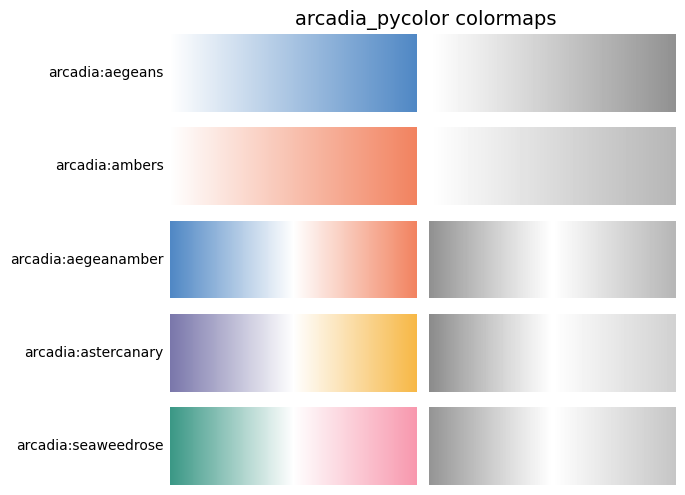

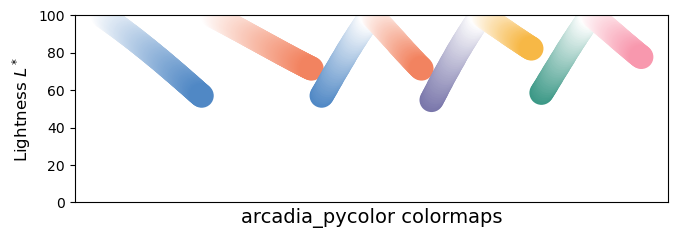

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import arcadia_pycolor as apc
from colorspacious import cspace_converter

# Indices to step through colormap.
x = np.linspace(0.0, 1.0, 100)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    fig, axs = plt.subplots(nrows=len(cmap_list), ncols=2)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99,
                        wspace=0.05)
    fig.suptitle(cmap_category + ' colormaps', fontsize=14, y=1.0, x=0.6)

    for ax, name in zip(axs, cmap_list):

        # Get RGB values for colormap.
        rgb = mpl.colormaps[name](x)[np.newaxis, :, :3]

        # Get colormap in CAM02-UCS colorspace. We want the lightness.
        lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
        L = lab[0, :, 0]
        L = np.float32(np.vstack((L, L, L)))

        ax[0].imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax[1].imshow(L, aspect='auto', cmap='binary_r', vmin=0., vmax=100.)
        pos = list(ax[0].get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs.flat:
        ax.set_axis_off()

    plt.show()
    
def plot_color_lightness(cmap_category, cmap_list, _DSUBS, _DC, steps):
    # Indices to step through colormap
    x = np.linspace(0.0, 1.0, steps)
    
    # Do subplots so that colormaps have enough space.
    # Default is 6 colormaps per subplot.
    dsub = _DSUBS.get(cmap_category, 6)
    nsubplots = int(np.ceil(len(cmap_list) / dsub))

    # squeeze=False to handle similarly the case of a single subplot
    fig, axs = plt.subplots(nrows=nsubplots, squeeze=False,
                            figsize=(7, 2.6*nsubplots))

    for i, ax in enumerate(axs.flat):

        locs = []  # locations for text labels

        for j, cmap in enumerate(cmap_list[i*dsub:(i+1)*dsub]):

            # Get RGB values for colormap and convert the colormap in
            # CAM02-UCS colorspace.  lab[0, :, 0] is the lightness.
            rgb = mpl.colormaps[cmap](x)[np.newaxis, :, :3]
            lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)

            # Plot colormap L values.  Do separately for each category
            # so each plot can be pretty.  To make scatter markers change
            # color along plot:
            # https://stackoverflow.com/q/8202605/

            if cmap_category == 'Sequential':
                # These colormaps all start at high lightness but we want them
                # reversed to look nice in the plot, so reverse the order.
                y_ = lab[0, ::-1, 0]
                c_ = x[::-1]
            else:
                y_ = lab[0, :, 0]
                c_ = x

            dc = _DC.get(cmap_category, 1.4)  # cmaps horizontal spacing
            ax.scatter(x + j*dc, y_, c=c_, cmap=cmap, s=300, linewidths=0.0)

            # Store locations for colormap labels
            if cmap_category in ('Perceptually Uniform Sequential',
                                 'Sequential'):
                locs.append(x[-1] + j*dc)
            elif cmap_category in ('Diverging', 'Qualitative', 'Cyclic',
                                   'Miscellaneous', 'Sequential (2)'):
                locs.append(x[int(x.size/2.)] + j*dc)

        # Set up the axis limits:
        #   * the 1st subplot is used as a reference for the x-axis limits
        #   * lightness values goes from 0 to 100 (y-axis limits)
        ax.set_xlim(axs[0, 0].get_xlim())
        ax.set_ylim(0.0, 100.0)

        # Set up labels for colormaps
        ax.xaxis.set_ticks_position('top')
        ticker = mpl.ticker.FixedLocator(locs)
        ax.xaxis.set_major_locator(ticker)
        formatter = mpl.ticker.FixedFormatter(cmap_list[i*dsub:(i+1)*dsub])
        ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.set_tick_params(rotation=50)
        ax.set_ylabel('Lightness $L^*$', fontsize=12)

    ax.set_xlabel(cmap_category + ' colormaps', fontsize=14)

    fig.tight_layout(h_pad=0.0, pad=1.5)
    plt.show()    


cmaps = {'arcadia_pycolor': ['arcadia:aegeans', 'arcadia:ambers', 'arcadia:aegeanamber', 'arcadia:astercanary', 'arcadia:seaweedrose']}

for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list)


# Number of colormap per subplot for particular cmap categories
_DSUBS = {'arcadia_pycolor': 5}

# Spacing between the colormaps of a subplot
_DC = {'arcadia_pycolor': 1.1 }

# Do plot
for cmap_category, cmap_list in cmaps.items():
    plot_color_lightness(cmap_category, cmap_list, _DSUBS, _DC, 100)

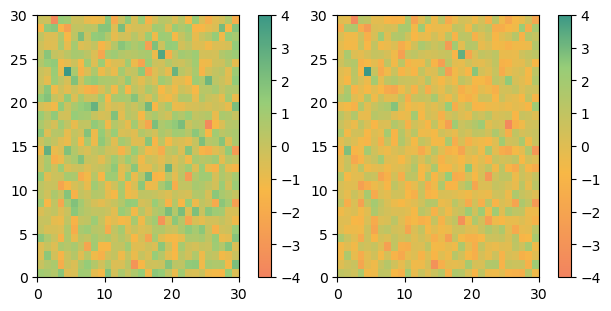

In [2]:
colors = ["arcadia:amber", "arcadia:canary", "arcadia:lime", "arcadia:seaweed"]
cmap1 = mpl.colors.LinearSegmentedColormap.from_list("arcadia:amberseaweed", colors)
nodes = [0.0, 0.4, 0.8, 1.0]
cmap2 = mpl.colors.LinearSegmentedColormap.from_list("arcadia:amberseaweed2", list(zip(nodes, colors)))

mpl.colormaps.register(cmap=cmap1)
mpl.colormaps.register(cmap=cmap2)

apc.plot_examples([cmap1, cmap2])

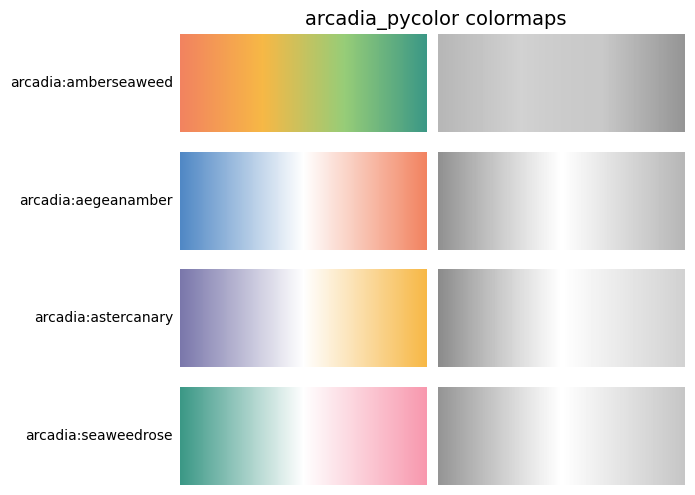

In [3]:
cmaps = {'arcadia_pycolor': ['arcadia:amberseaweed', 'arcadia:aegeanamber', 'arcadia:astercanary', 'arcadia:seaweedrose']}

for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list)

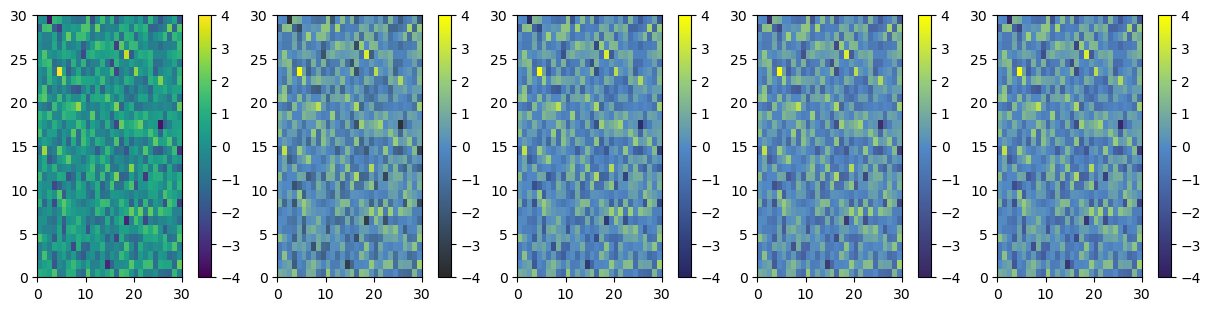

In [20]:
color_lists = {
    'arcadia:viridis1': {
        'colors': ["arcadia:crow", "arcadia:aegean", "arcadia:lime", "yellow"],
        'nodes': [0, 0.49, 0.75, 1]
    },
    'arcadia:viridis2': {
        'colors': ["#262560", "arcadia:aegean", "arcadia:lime", "yellow"],
        'nodes': [0, 0.49, 0.75, 1]
    },
    'arcadia:viridis3': {
        'colors': ["#3A2560", "arcadia:aegean", "arcadia:lime", "yellow"],
        'nodes': [0, 0.49, 0.75, 1]
    },
    'arcadia:viridis4': {
        'colors': ["#341E60", "arcadia:aegean", "arcadia:lime", "yellow"],
        'nodes': [0, 0.49, 0.75, 1]
    }
    
}

def make_LSCM(key, colors, nodes):
    if nodes == []:
        cmap = mpl.colors.LinearSegmentedColormap.from_list(key, colors)
    else:
        cmap = mpl.colors.LinearSegmentedColormap.from_list(key, list(zip(nodes, colors)))
    
    if key not in mpl.colormaps.keys():
        mpl.colormaps.register(cmap=cmap)

for key, attr in color_lists.items():
    make_LSCM(key, attr['colors'], attr['nodes'])

apc.plot_examples(['viridis'] + [key for key in color_lists])

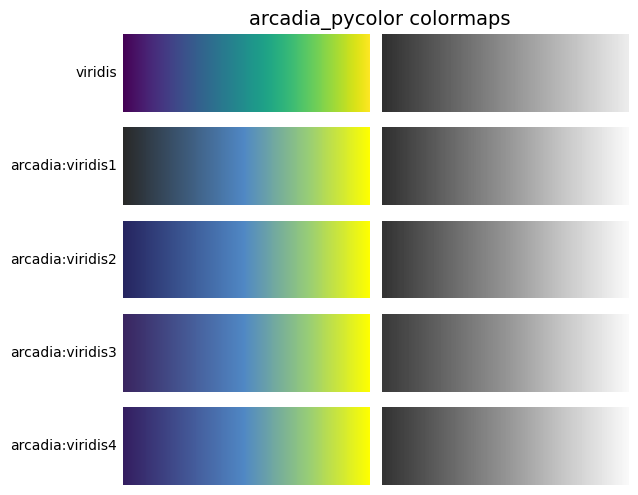

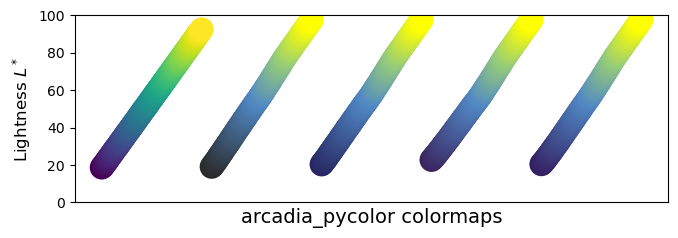

In [21]:
cmaps = {'arcadia_pycolor': ['viridis'] + [key for key in color_lists]}

for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list)

# Number of colormap per subplot for particular cmap categories
_DSUBS = {'arcadia_pycolor': 9}

# Spacing between the colormaps of a subplot
_DC = {'arcadia_pycolor': 1.1 }

# Do plot
for cmap_category, cmap_list in cmaps.items():
    plot_color_lightness(cmap_category, cmap_list, _DSUBS, _DC, 100)

In [ ]:
cmaps = {'arcadia_pycolor': ['magma'] + [key for key in color_lists]}

for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list)

# Number of colormap per subplot for particular cmap categories
_DSUBS = {'arcadia_pycolor': 9}

# Spacing between the colormaps of a subplot
_DC = {'arcadia_pycolor': 1.1 }

# Do plot
for cmap_category, cmap_list in cmaps.items():
    plot_color_lightness(cmap_category, cmap_list, _DSUBS, _DC, 100)

FINAL

color_lists = {
    'arcadia:viridis': {
        'colors': ["arcadia:crow", "arcadia:aegean", "arcadia:lime", "yellow"],
        'nodes': [0, 0.49, 0.75, 1]
    },
    'arcadia:magma': {
        'colors': ["arcadia:black", "#5A4596", "#E87485", "arcadia:orange", "arcadia:oat"],
        'nodes': [0, 0.38, 0.72, 0.9, 1]
    },
}


DEPRECATED

color_lists = {
    'arcadia:viridis1': {
        'colors': ["arcadia:crow", "arcadia:forest", "arcadia:aegean", "arcadia:vitalblue", "arcadia:lime", "yellow"],
        'nodes': []
    },
    'arcadia:viridis2': {
        'colors': ["arcadia:crow", "arcadia:aegean", "arcadia:vitalblue", "arcadia:lime", "yellow"],
        'nodes': []
    },
    'arcadia:viridis3': {
        'colors': ["arcadia:crow", "arcadia:aegean", "yellow"],
        'nodes': []
    },
    'arcadia:viridis4': {
        'colors': ["arcadia:crow", "arcadia:aegean", "arcadia:lime", "yellow"],
        'nodes': [0, 0.49, 0.75, 1]
    },
    'arcadia:viridis5': {
        'colors': ["arcadia:crow", "arcadia:aster", "arcadia:aegean", "arcadia:lime", "yellow"],
        'nodes': [0, 0.4, 0.49, 0.75, 1]
    },
    'arcadia:viridis6': {
        'colors': ["arcadia:crow", "arcadia:aster", "arcadia:aegean", "arcadia:lime", "yellow"],
        'nodes': [0, 0.25, 0.49, 0.75, 1]
    }
}

color_lists = {
    'arcadia:magma1': {
        'colors': ["arcadia:crow", "arcadia:aster", "arcadia:amber", "arcadia:orange", "arcadia:oat"],
        'nodes': [0, 0.49, 0.75, 0.9, 1]
    },
    'arcadia:magma2': {
        'colors': ["arcadia:crow", "arcadia:aster", "arcadia:amber", "arcadia:orange", "arcadia:shell"],
        'nodes': [0, 0.52, 0.75, 0.9, 1]
    },
    'arcadia:magma3': {
        'colors': ["arcadia:crow", "arcadia:aster", "arcadia:amber", "arcadia:orange", "arcadia:dawn"],
        'nodes': [0, 0.52, 0.75, 0.9, 1]
    },
    'arcadia:magma4': {
        'colors': ["arcadia:black", "arcadia:aster", "arcadia:amber", "arcadia:orange", "arcadia:oat"],
        'nodes': [0, 0.54, 0.75, 0.9, 1]
    },
    'arcadia:magma5': {
        'colors': ["arcadia:black", "arcadia:aster", "arcadia:amber", "arcadia:orange", "arcadia:oat"],
        'nodes': [0, 0.54, 0.75, 0.9, 1]
    },
    'arcadia:magma6': {
        'colors': ["arcadia:black", "#9570AC", "#F58090", "arcadia:orange", "arcadia:oat"],
        'nodes': [0, 0.54, 0.75, 0.9, 1]
    },
    'arcadia:magma7': {
        'colors': ["arcadia:black", "#5A4596", "#FA8191", "arcadia:orange", "arcadia:oat"],
        'nodes': [0, 0.4, 0.75, 0.9, 1]
    },
    'arcadia:magma8': {
        'colors': ["arcadia:black", "#5A4596", "#E87485", "arcadia:orange", "arcadia:oat"],
        'nodes': [0, 0.38, 0.72, 0.9, 1]
    },
}

color_lists = {
    'arcadia:cubehelix1': {
        'colors': ["arcadia:black", "arcadia:seaweed", "arcadia:chateau", "arcadia:rose", "arcadia:bluesky"],
        'nodes': [0, 0.38, 0.72, 0.9, 1]
    },
    'arcadia:cubehelix2': {
        'colors': ["arcadia:black", "arcadia:forest", "arcadia:lime", "arcadia:canary", "arcadia:rose", "arcadia:wish", "arcadia:bluesky", "arcadia:zephyr"],
        'nodes': [0, 0.3, 0.4, 0.5, 0.63, 0.7, 0.9, 1]
    },
    'arcadia:cubehelix3': {
        'colors': ["arcadia:black", "arcadia:forest", "arcadia:sage", "arcadia:mars", "arcadia:rose", "arcadia:wish", "arcadia:bluesky", "arcadia:zephyr"],
        'nodes': [0, 0.3, 0.4, 0.5, 0.63, 0.7, 0.9, 1]
    },
    'arcadia:cubehelix4': {
        'colors': ["arcadia:black", "#30542A", "arcadia:seaweed", "arcadia:mars", "arcadia:rose", "arcadia:wish", "arcadia:bluesky", "arcadia:zephyr"],
        'nodes': [0, 0.3, 0.4, 0.5, 0.63, 0.7, 0.9, 1]
    },
    'arcadia:cubehelix5': {
        'colors': ["arcadia:black", "#102452", "#30542A", "arcadia:seaweed", "arcadia:mars", "arcadia:rose", "arcadia:wish", "arcadia:bluesky", "arcadia:zephyr"],
        'nodes': [0, 0.15, 0.3, 0.4, 0.5, 0.63, 0.7, 0.9, 1]
    }
}